#  Dinamica  Molecular :


La  evolución  clasica de un  sistema de  paticulas  esta  dado  por  las  ecvuaciones  de  Newton 

$$m_{i}\frac{d^2\vec{x}_{i}}{dt^2}=\sum_{j}\vec{F}_{j}$$

La idea  es  determinar  la  evolución dinamica del  sistema,  es  decir  determinar,  la posición, la  velocidad  y  algunos parametros  macorscopicos  como  la  temperatura.  La  temperatura,  esta relacionada  con  la  energia  cinetica  del  sistema  por  medio  de la  teoria  cinetica  de los  gases.  En el  caso  de  un  sistema  bidimensional,  tenemos :

$$ T(t)=\sum_{i=1}^{N}\frac{m_{i}|\vec{v}_{i}(t)|^{2}}{K_{B}N_{f}}$$,

donde $N_{f}$  es el  numero de grados de  libertad  del  sistema.


2.786781207773585e-10
300.0000000000001


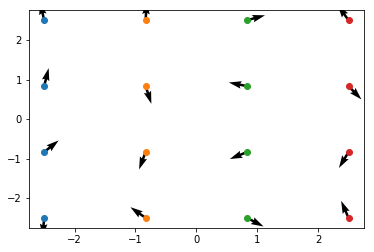

In [1]:
#  System initialization 

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

Kb= 1.3806488e-23
T =300
mass= 0.1

nx = 4
ny = 4
lx = 5.
ly = 5.
N  = nx*ny
Nf = 2*N-2

x= np.linspace(-lx/2,lx/2,nx)
y= np.linspace(-ly/2,ly/2,ny)
X,Y = np.meshgrid(x,y)

# -------------------------------------------------
#  setup  initial  conditions
# -------------------------------------------------
Vx=np.random.uniform(-1.,1., (nx,ny))
Vy=np.random.uniform(-1.,1., (nx,ny))

# -------------------------------------------------
#  Eliminamos  el  movimiento  del  centro  de masa
# -------------------------------------------------
Vcmx = np.sum(Vx)/N
Vcmy = np.sum(Vy)/N

Vx=Vx-Vcmx
Vy=Vy-Vcmy

facnorm =np.sqrt(T*Kb*Nf/(mass*N))
norm = np.sqrt(Vx**2+Vy**2)
Vx = facnorm*Vx/norm
Vy = facnorm*Vy/norm

Ttest = np.sum(mass*(Vx**2+Vy**2)/(Kb*Nf))
        
fig1, ax1 = plt.subplots()
ax1.plot(X,Y, "o")
ax1.quiver(X,Y,Vx,Vy)
print(np.sqrt(Vx[0,0]**2+Vy[0,0]**2))
print(Ttest)